# Preprocessing

In [1]:
#Import Library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
#Import dataset

datapath = '../../../1. Data/Raw/Data Historis PTBA.csv'
dataset = pd.read_csv(datapath)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,01/03/2024,2580,2590,2610,2570,"8,63M","0,78%"
1,29/02/2024,2560,2620,2630,2560,"16,56M","-2,29%"
2,28/02/2024,2620,2600,2630,2600,"5,27M","1,16%"
3,27/02/2024,2590,2600,2610,2590,"5,65M","0,39%"
4,26/02/2024,2580,2640,2640,2580,"11,68M","-1,90%"
...,...,...,...,...,...,...,...
2426,07/03/2014,9425,9600,9600,9400,"2,41M","-1,05%"
2427,06/03/2014,9525,9550,9575,9500,"2,60M","0,00%"
2428,05/03/2014,9525,9625,9650,9500,"3,45M","0,00%"
2429,04/03/2014,9525,9425,9600,9375,"5,91M","1,87%"


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     2431 non-null   object
 1   Terakhir    2431 non-null   int64 
 2   Pembukaan   2431 non-null   int64 
 3   Tertinggi   2431 non-null   int64 
 4   Terendah    2431 non-null   int64 
 5   Vol         2431 non-null   object
 6   Perubahan%  2431 non-null   object
dtypes: int64(4), object(3)
memory usage: 133.1+ KB


In [4]:
dataset.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah
count,2431.000000,2431.000000,2431.000000,2431.000000
mean,4044.846977,4051.382559,4113.240642,3988.388318
std,3046.771520,3047.802553,3093.134209,3005.955155
min,833.000000,846.000000,859.000000,830.000000
25%,2292.500000,2300.000000,2340.000000,2260.000000
50%,2790.000000,2795.000000,2830.000000,2760.000000
75%,4130.000000,4140.000000,4180.000000,4080.000000
max,13975.000000,14100.000000,14150.000000,13900.000000


In [5]:
dataset.isna().sum().to_frame(name='num_of_NaN')

,num_of_NaN
Tanggal,0
Terakhir,0
Pembukaan,0
Tertinggi,0
Terendah,0
Vol,0
Perubahan%,0


In [6]:
from datetime import datetime
dataset['Tanggal'] = pd.to_datetime(dataset['Tanggal'],
                                   format = '%d/%m/%Y')
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-03-01,2580,2590,2610,2570,"8,63M","0,78%"
1,2024-02-29,2560,2620,2630,2560,"16,56M","-2,29%"
2,2024-02-28,2620,2600,2630,2600,"5,27M","1,16%"
3,2024-02-27,2590,2600,2610,2590,"5,65M","0,39%"
4,2024-02-26,2580,2640,2640,2580,"11,68M","-1,90%"
...,...,...,...,...,...,...,...
2426,2014-03-07,9425,9600,9600,9400,"2,41M","-1,05%"
2427,2014-03-06,9525,9550,9575,9500,"2,60M","0,00%"
2428,2014-03-05,9525,9625,9650,9500,"3,45M","0,00%"
2429,2014-03-04,9525,9425,9600,9375,"5,91M","1,87%"


In [7]:
dataset = dataset.sort_values(by='Tanggal',
                              ascending = True,
                              ignore_index = True)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,9350,9475,9500,9325,"3,04M","-2,35%"
1,2014-03-04,9525,9425,9600,9375,"5,91M","1,87%"
2,2014-03-05,9525,9625,9650,9500,"3,45M","0,00%"
3,2014-03-06,9525,9550,9575,9500,"2,60M","0,00%"
4,2014-03-07,9425,9600,9600,9400,"2,41M","-1,05%"
...,...,...,...,...,...,...,...
2426,2024-02-26,2580,2640,2640,2580,"11,68M","-1,90%"
2427,2024-02-27,2590,2600,2610,2590,"5,65M","0,39%"
2428,2024-02-28,2620,2600,2630,2600,"5,27M","1,16%"
2429,2024-02-29,2560,2620,2630,2560,"16,56M","-2,29%"


In [8]:
dataset_B = dataset[dataset['Vol'].str.contains('B')]
print(dataset_B)

Empty DataFrame
Columns: [Tanggal, Terakhir, Pembukaan, Tertinggi, Terendah, Vol, Perubahan%]
Index: []


In [9]:
dataset_M = dataset[dataset['Vol'].str.contains('M')]
print(dataset_M)

        Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah     Vol Perubahan%
0    2014-03-03      9350       9475       9500      9325   3,04M     -2,35%
1    2014-03-04      9525       9425       9600      9375   5,91M      1,87%
2    2014-03-05      9525       9625       9650      9500   3,45M      0,00%
3    2014-03-06      9525       9550       9575      9500   2,60M      0,00%
4    2014-03-07      9425       9600       9600      9400   2,41M     -1,05%
...         ...       ...        ...        ...       ...     ...        ...
2426 2024-02-26      2580       2640       2640      2580  11,68M     -1,90%
2427 2024-02-27      2590       2600       2610      2590   5,65M      0,39%
2428 2024-02-28      2620       2600       2630      2600   5,27M      1,16%
2429 2024-02-29      2560       2620       2630      2560  16,56M     -2,29%
2430 2024-03-01      2580       2590       2610      2570   8,63M      0,78%

[2398 rows x 7 columns]


In [10]:
dataset_K = dataset[dataset['Vol'].str.contains('K')]
print(dataset_K)

       Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah      Vol Perubahan%
22  2014-04-03      9425       9400       9450      9400  840,00K     -0,26%
107 2014-08-15     12775      12900      12975     12750  917,60K     -0,97%
128 2014-09-15     13125      13000      13250     13000  932,20K     -1,13%
143 2014-10-06     12800      12975      12975     12700  551,20K     -0,58%
157 2014-10-24     12275      12500      12575     12275  529,40K     -1,41%
163 2014-11-03     12800      13200      13200     12650  861,60K     -1,16%
166 2014-11-06     12575      12675      12750     12575  720,00K     -0,79%
167 2014-11-07     12550      12600      12725     12450  445,00K     -0,20%
168 2014-11-10     12650      12600      12750     12600  445,30K      0,80%
169 2014-11-11     12875      12600      12925     12600  734,20K      1,78%
170 2014-11-12     12600      13000      13000     12525  909,60K     -2,14%
171 2014-11-13     12350      12750      12750     12325  984,40K     -1,98%

In [11]:
dataset = dataset.replace(to_replace = ',',
                          value = '.',
                          regex = True)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,9350,9475,9500,9325,3.04M,-2.35%
1,2014-03-04,9525,9425,9600,9375,5.91M,1.87%
2,2014-03-05,9525,9625,9650,9500,3.45M,0.00%
3,2014-03-06,9525,9550,9575,9500,2.60M,0.00%
4,2014-03-07,9425,9600,9600,9400,2.41M,-1.05%
...,...,...,...,...,...,...,...
2426,2024-02-26,2580,2640,2640,2580,11.68M,-1.90%
2427,2024-02-27,2590,2600,2610,2590,5.65M,0.39%
2428,2024-02-28,2620,2600,2630,2600,5.27M,1.16%
2429,2024-02-29,2560,2620,2630,2560,16.56M,-2.29%


In [12]:
def replace_value(value):
    if 'K' in value:
        return str(float(value.replace('K', '')) * 1000)
    elif 'M' in value:
        return str(float(value.replace('M', '')) * 1000000)
    elif 'B' in value:
        return str(float(value.replace('B', '')) * 1000000000)
    return value

dataset['Vol'] = dataset['Vol'].apply(replace_value)

dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,9350,9475,9500,9325,3040000.0,-2.35%
1,2014-03-04,9525,9425,9600,9375,5910000.0,1.87%
2,2014-03-05,9525,9625,9650,9500,3450000.0,0.00%
3,2014-03-06,9525,9550,9575,9500,2600000.0,0.00%
4,2014-03-07,9425,9600,9600,9400,2410000.0,-1.05%
...,...,...,...,...,...,...,...
2426,2024-02-26,2580,2640,2640,2580,11680000.0,-1.90%
2427,2024-02-27,2590,2600,2610,2590,5650000.0,0.39%
2428,2024-02-28,2620,2600,2630,2600,5270000.0,1.16%
2429,2024-02-29,2560,2620,2630,2560,16559999.999999998,-2.29%


In [13]:
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir               int64
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [14]:
dataset = dataset.astype({'Terakhir': 'float32'})
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [15]:
dataset = dataset.astype({'Vol': 'float32'})
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                  float32
Perubahan%            object
dtype: object

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2431 non-null   datetime64[ns]
 1   Terakhir    2431 non-null   float32       
 2   Pembukaan   2431 non-null   int64         
 3   Tertinggi   2431 non-null   int64         
 4   Terendah    2431 non-null   int64         
 5   Vol         2431 non-null   float32       
 6   Perubahan%  2431 non-null   object        
dtypes: datetime64[ns](1), float32(2), int64(3), object(1)
memory usage: 114.1+ KB


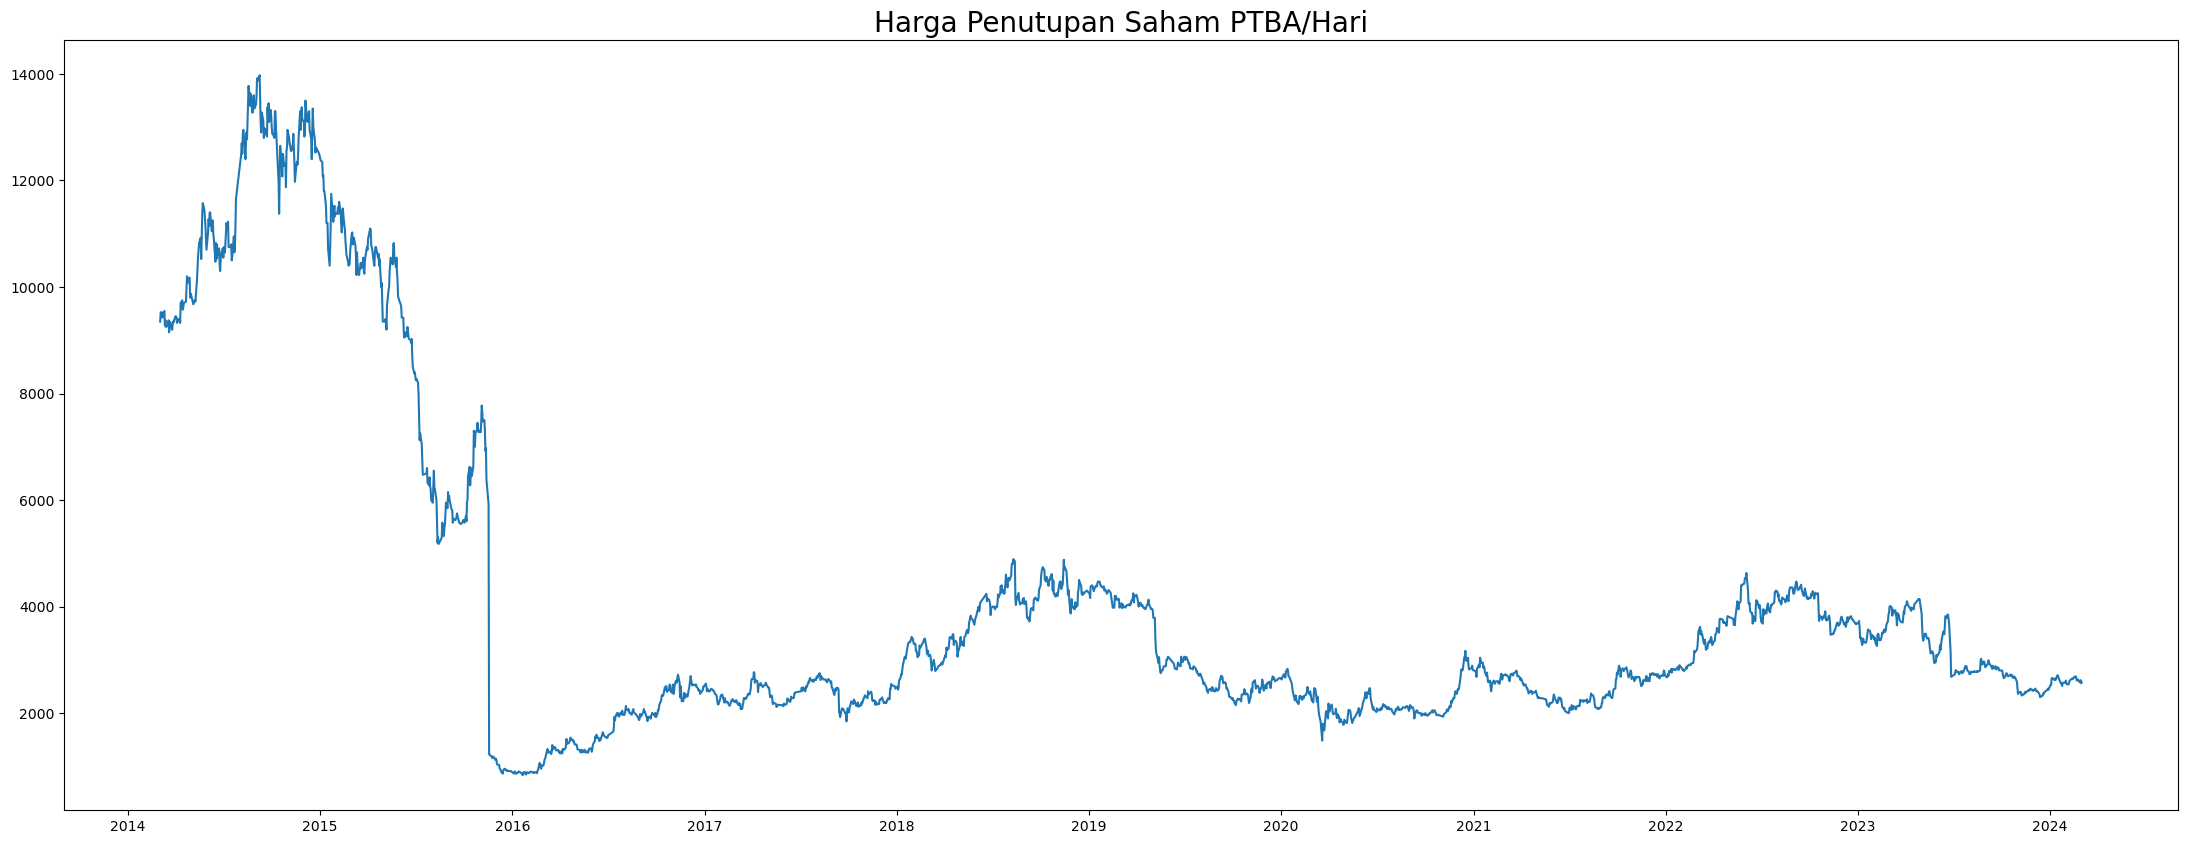

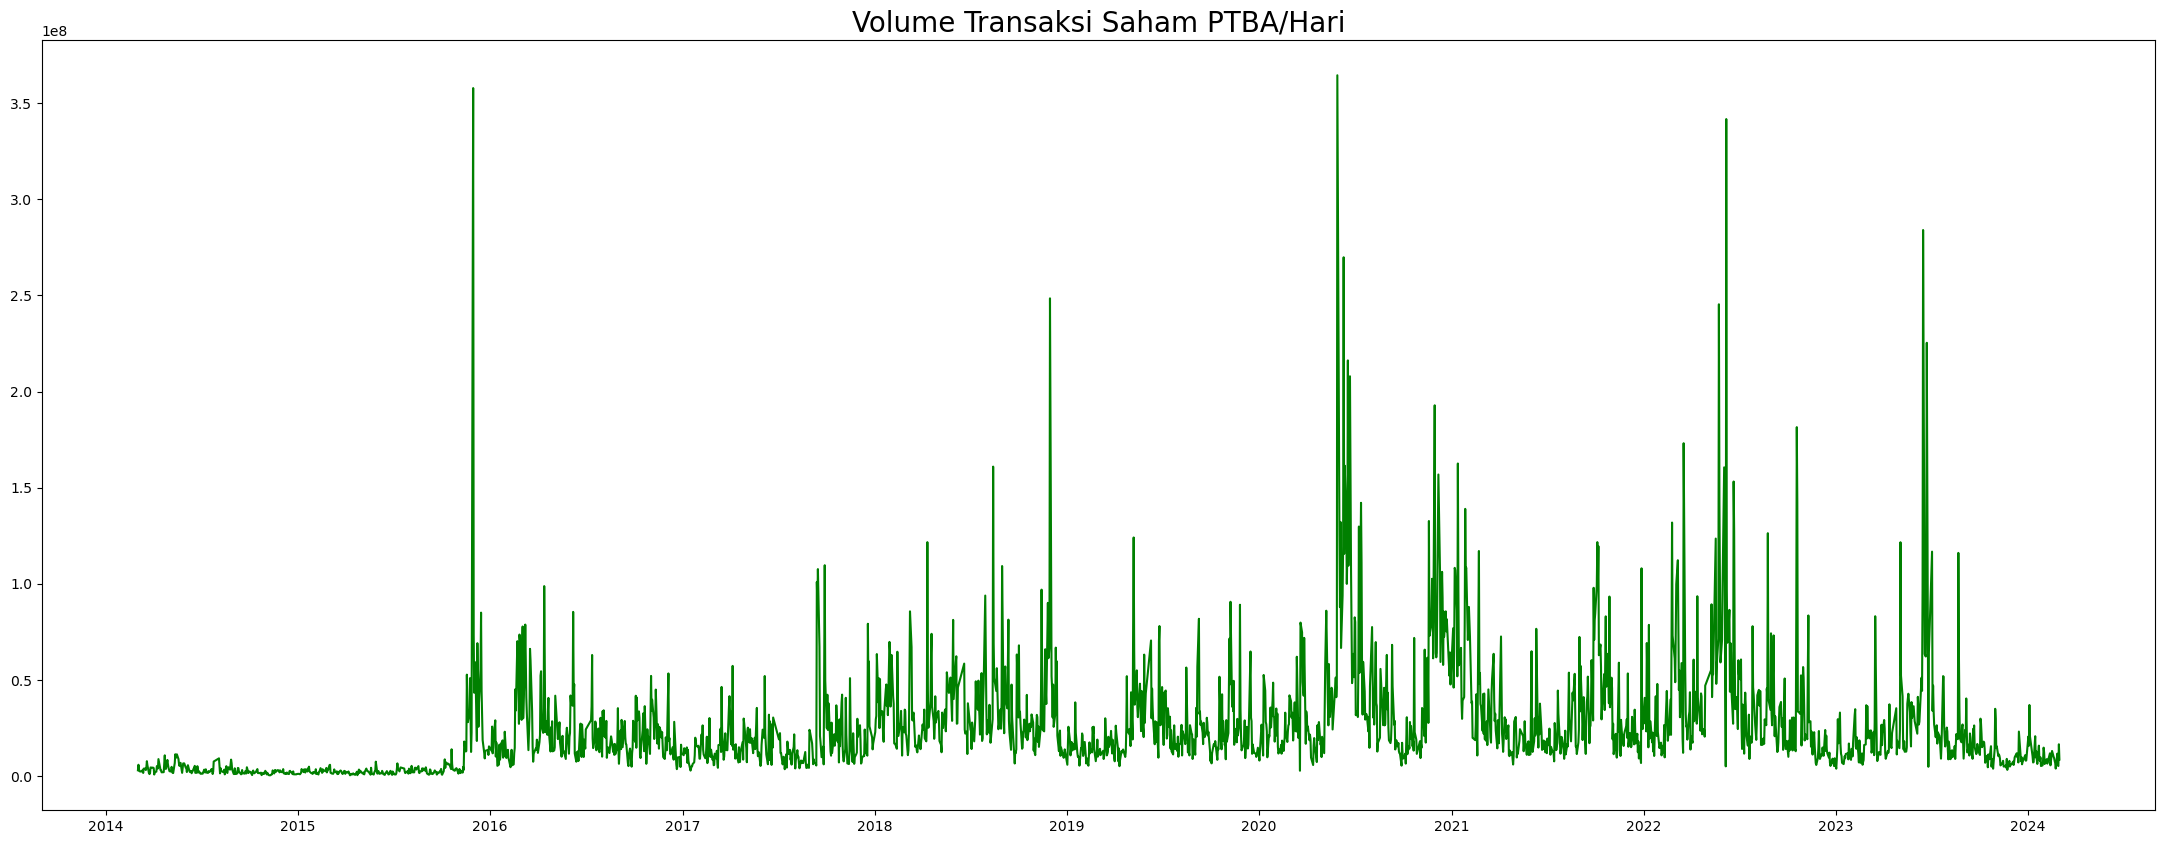

In [17]:
plt.figure(figsize=(60,10))

plt.subplot(1,2,1)
plt.plot(dataset['Tanggal'], dataset['Terakhir'])
plt.title('Harga Penutupan Saham PTBA/Hari', fontsize = 20)

plt.figure(figsize=(60,10))

plt.subplot(1,2,1)
plt.plot(dataset['Tanggal'], dataset['Vol'], 'g')
plt.title('Volume Transaksi Saham PTBA/Hari', fontsize = 20)

plt.show()

In [18]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu")
print(f"Using {device} device")

Using cuda device


In [19]:
data_use = np.column_stack((dataset['Terakhir'], dataset['Vol']))
tanggal_data = pd.DataFrame({'Tanggal' : dataset['Tanggal']})

print(data_use)
print(tanggal_data)

[[9.350e+03 3.040e+06]
 [9.525e+03 5.910e+06]
 [9.525e+03 3.450e+06]
 ...
 [2.620e+03 5.270e+06]
 [2.560e+03 1.656e+07]
 [2.580e+03 8.630e+06]]
        Tanggal
0    2014-03-03
1    2014-03-04
2    2014-03-05
3    2014-03-06
4    2014-03-07
...         ...
2426 2024-02-26
2427 2024-02-27
2428 2024-02-28
2429 2024-02-29
2430 2024-03-01

[2431 rows x 1 columns]


In [20]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_use)

In [21]:
seq_length = 1

x_train = []
y_train = []

seq_length = 10
for i in range (len(scaled_data) - seq_length):
    x_train.append(scaled_data[i:i + seq_length])
    y_train.append(scaled_data[i + seq_length, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train).reshape(-1, 1)

In [22]:
print(x_train)
print(y_train)

[[[0.64807487 0.00713934]
  [0.66139096 0.01502312]
  [0.66139096 0.0082656 ]
  ...
  [0.64236796 0.00774368]
  [0.64997715 0.00334854]
  [0.6404657  0.00947426]]

 [[0.66139096 0.01502312]
  [0.66139096 0.0082656 ]
  [0.66139096 0.00593068]
  ...
  [0.64997715 0.00334854]
  [0.6404657  0.00947426]
  [0.64236796 0.00969402]]

 [[0.66139096 0.0082656 ]
  [0.66139096 0.00593068]
  [0.6537818  0.00540876]
  ...
  [0.6404657  0.00947426]
  [0.64236796 0.00969402]
  [0.64236796 0.00744151]]

 ...

 [[0.13749811 0.0142265 ]
  [0.13901994 0.02809864]
  [0.14054179 0.03474628]
  ...
  [0.13673717 0.00958414]
  [0.13293257 0.03087307]
  [0.13369352 0.01430891]]

 [[0.13901994 0.02809864]
  [0.14054179 0.03474628]
  [0.1413027  0.02636805]
  ...
  [0.13293257 0.03087307]
  [0.13369352 0.01430891]
  [0.13597625 0.01326506]]

 [[0.14054179 0.03474628]
  [0.1413027  0.02636805]
  [0.13749811 0.0243353 ]
  ...
  [0.13369352 0.01430891]
  [0.13597625 0.01326506]
  [0.13141075 0.04427822]]]
[[0.642367

In [23]:
train_size = int(len(x_train) * 0.7)
x_train, x_test = x_train[:train_size], x_train[train_size:]
y_train, y_test = y_train[:train_size], y_train[train_size:]
tanggal_train, tanggal_test = tanggal_data[seq_length:train_size+seq_length],tanggal_data[train_size+seq_length:]

print(x_train.shape)
print(y_train.shape)
print(tanggal_train.shape)
print(y_test.shape)
print(tanggal_test.shape)

print(tanggal_test)

(1694, 10, 2)
(1694, 1)
(1694, 1)
(727, 1)
(727, 1)
        Tanggal
1704 2021-03-10
1705 2021-03-12
1706 2021-03-15
1707 2021-03-16
1708 2021-03-17
...         ...
2426 2024-02-26
2427 2024-02-27
2428 2024-02-28
2429 2024-02-29
2430 2024-03-01

[727 rows x 1 columns]


In [24]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [25]:
# Memastikan bentuk data benar
print(f"x_train_tensor shape: {x_train_tensor.shape}")  # (num_samples, seq_length, num_features)
print(f"y_train_tensor shape: {y_train_tensor.shape}")  # (num_samples, 1)
print(f"x_test_tensor shape: {x_test_tensor.shape}")    # (num_samples, seq_length, num_features)
print(f"y_test_tensor shape: {y_test_tensor.shape}")    # (num_samples, 1)

# Menampilkan contoh data dari x_train_tensor dan y_train_tensor
print("\nContoh data dari x_train_tensor:")
print(x_train_tensor[0])  # Menampilkan sampel pertama dari x_train_tensor

print("\nContoh data dari y_train_tensor:")
print(y_train_tensor[0])  # Menampilkan target pertama dari y_train_tensor

x_train_tensor shape: torch.Size([1694, 10, 2])
y_train_tensor shape: torch.Size([1694, 1])
x_test_tensor shape: torch.Size([727, 10, 2])
y_test_tensor shape: torch.Size([727, 1])

Contoh data dari x_train_tensor:
tensor([[0.6481, 0.0071],
        [0.6614, 0.0150],
        [0.6614, 0.0083],
        [0.6614, 0.0059],
        [0.6538, 0.0054],
        [0.6614, 0.0055],
        [0.6633, 0.0053],
        [0.6424, 0.0077],
        [0.6500, 0.0033],
        [0.6405, 0.0095]])

Contoh data dari y_train_tensor:
tensor([0.6424])


In [26]:
class StockPricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(StockPricePredictor, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.gru1 = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.gru2 = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        h0_lstm1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0_lstm1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm1(x, (h0_lstm1, c0_lstm1))
        
        h0_gru1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru1(out, h0_gru1)
        
        h0_lstm2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0_lstm2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm2(out, (h0_lstm2, c0_lstm2))
        
        h0_gru2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru2(out, h0_gru2)
        
        out = self.fc(out[:, -1, :])
        return out

In [27]:
# Membuat TensorDataset dan DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [28]:
print(f"x_train_tensor shape: {x_train_tensor.shape}")  # (num_samples, seq_length, num_features)
print(f"y_train_tensor shape: {y_train_tensor.shape}")  # (num_samples, 1)
print(f"x_test_tensor shape: {x_test_tensor.shape}")    # (num_samples, seq_length, num_features)
print(f"y_test_tensor shape: {y_test_tensor.shape}")    # (num_samples, 1)


x_train_tensor shape: torch.Size([1694, 10, 2])
y_train_tensor shape: torch.Size([1694, 1])
x_test_tensor shape: torch.Size([727, 10, 2])
y_test_tensor shape: torch.Size([727, 1])


In [29]:
input_size = x_train_tensor.shape[2]  # number of features, in this case 2
hidden_size = 64
num_layers = 1
num_epochs = 20
learning_rate = 0.001

# Initialize model, loss function, optimizer
model = StockPricePredictor(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    # Average training loss for this epoch
    train_losses.append(epoch_train_loss / len(train_loader))
    
    # Validation loss
    model.eval()
    epoch_val_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_targets in test_loader:
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_targets)
            epoch_val_loss += val_loss.item()
    
    # Average validation loss for this epoch
    val_losses.append(epoch_val_loss / len(test_loader))
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')


Epoch [1/20], Loss: 0.0036
Epoch [1/20], Training Loss: 0.0519, Validation Loss: 0.0023
Epoch [2/20], Loss: 0.0012
Epoch [2/20], Training Loss: 0.0027, Validation Loss: 0.0005
Epoch [3/20], Loss: 0.0005
Epoch [3/20], Training Loss: 0.0015, Validation Loss: 0.0006
Epoch [4/20], Loss: 0.0007
Epoch [4/20], Training Loss: 0.0014, Validation Loss: 0.0003
Epoch [5/20], Loss: 0.0011
Epoch [5/20], Training Loss: 0.0013, Validation Loss: 0.0007
Epoch [6/20], Loss: 0.0008
Epoch [6/20], Training Loss: 0.0014, Validation Loss: 0.0002
Epoch [7/20], Loss: 0.0005
Epoch [7/20], Training Loss: 0.0012, Validation Loss: 0.0003
Epoch [8/20], Loss: 0.0004
Epoch [8/20], Training Loss: 0.0012, Validation Loss: 0.0002
Epoch [9/20], Loss: 0.0005
Epoch [9/20], Training Loss: 0.0011, Validation Loss: 0.0002
Epoch [10/20], Loss: 0.0004
Epoch [10/20], Training Loss: 0.0011, Validation Loss: 0.0002
Epoch [11/20], Loss: 0.0004
Epoch [11/20], Training Loss: 0.0011, Validation Loss: 0.0004
Epoch [12/20], Loss: 0.0008


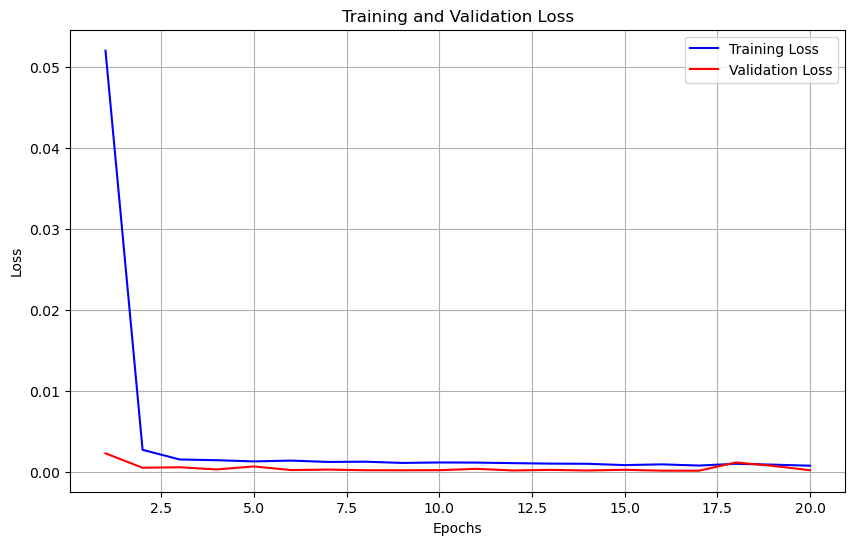

In [30]:
# Visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Evaluation
model.eval()
with torch.no_grad():
    test_loss = 0
    predictions = []
    actuals = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(targets.cpu().numpy())

test_loss /= len(test_loader)
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.0002


In [32]:
# Convert predictions and actuals to numpy arrays
predictions = np.array(predictions)
actuals = np.array(actuals)

In [33]:
# Predictions
model.eval()
with torch.no_grad():
    predictions = []
    for inputs, _ in test_loader:
        outputs = model(inputs)
        predictions.extend(outputs.cpu().numpy())

predictions = np.array(predictions)
print(predictions[:10])  # Menampilkan 10 prediksi pertama

[[0.1339031 ]
 [0.13238193]
 [0.13132782]
 [0.13137367]
 [0.13213842]
 [0.13304438]
 [0.13389407]
 [0.13471098]
 [0.13561551]
 [0.13691607]]


In [34]:
# Membuat DataFrame untuk perbandingan hasil prediksi dan nilai aktual
comparison_df = pd.DataFrame({
    'Predicted': predictions.flatten(),
    'Actual': actuals.flatten()
})

# Menampilkan DataFrame
print(comparison_df)

     Predicted    Actual
0     0.133903  0.134454
1     0.132382  0.144346
2     0.131328  0.145107
3     0.131374  0.142825
4     0.132138  0.142825
..         ...       ...
722   0.128790  0.132933
723   0.127990  0.133694
724   0.127088  0.135976
725   0.126462  0.131411
726   0.125756  0.132933

[727 rows x 2 columns]


In [35]:
# Menghitung metrik
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actuals, predictions)

# Menampilkan hasil
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")

MSE: 0.0002
RMSE: 0.0138
MAPE: 6.4785%


In [36]:
# Membuat Data Frame
train_df = pd.DataFrame({
    'Tanggal': tanggal_train['Tanggal'],
    'Value': y_train.flatten(),
    'Type': 'Train'
})

test_df = pd.DataFrame({
    'Tanggal': tanggal_test['Tanggal'],
    'Value': y_test.flatten(),
    'Type': 'Test'
})

predicted_df = pd.DataFrame({
    'Tanggal': tanggal_test['Tanggal'],
    'Value': predictions.flatten(),
    'Type': 'Predicted'
})

In [37]:
compact_df = pd.concat([test_df, predicted_df])

In [38]:
# Menggabungkan DataFrame
combined_df = pd.concat([train_df, test_df, predicted_df])

# Menampilkan DataFrame
print(combined_df)

        Tanggal     Value       Type
10   2014-03-17  0.642368      Train
11   2014-03-18  0.642368      Train
12   2014-03-19  0.649977      Train
13   2014-03-20  0.632856      Train
14   2014-03-21  0.648075      Train
...         ...       ...        ...
2426 2024-02-26  0.128790  Predicted
2427 2024-02-27  0.127990  Predicted
2428 2024-02-28  0.127088  Predicted
2429 2024-02-29  0.126462  Predicted
2430 2024-03-01  0.125756  Predicted

[3148 rows x 3 columns]


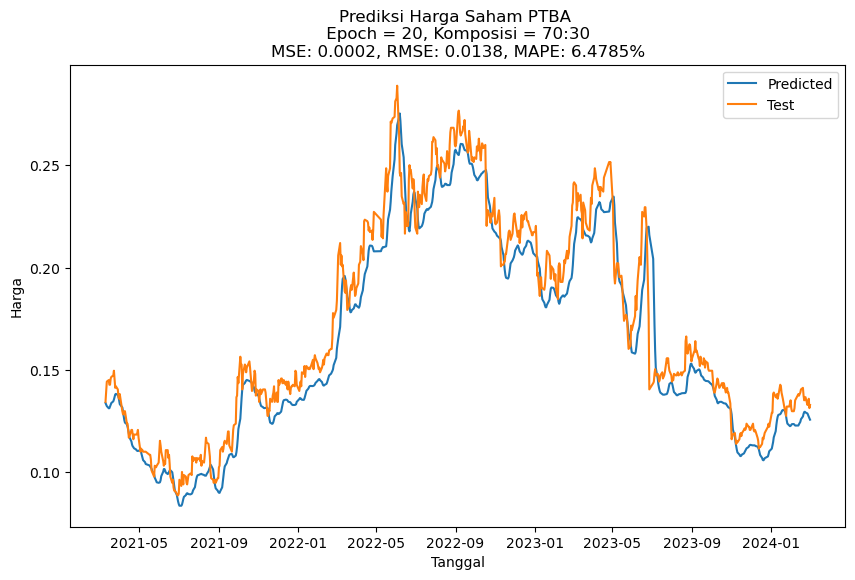

In [39]:
# Plotting hasil prediksi dan nilai aktual
plt.figure(figsize=(10, 6))
for label, df in compact_df.groupby('Type'):
    plt.plot(df['Tanggal'], df['Value'], label=label)
plt.title('Prediksi Harga Saham PTBA \n 'f"Epoch = {num_epochs}"', Komposisi = 70:30 \n' f"MSE: {mse:.4f}" ', ' f"RMSE: {rmse:.4f}" ', ' f"MAPE: {mape:.4%}")
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

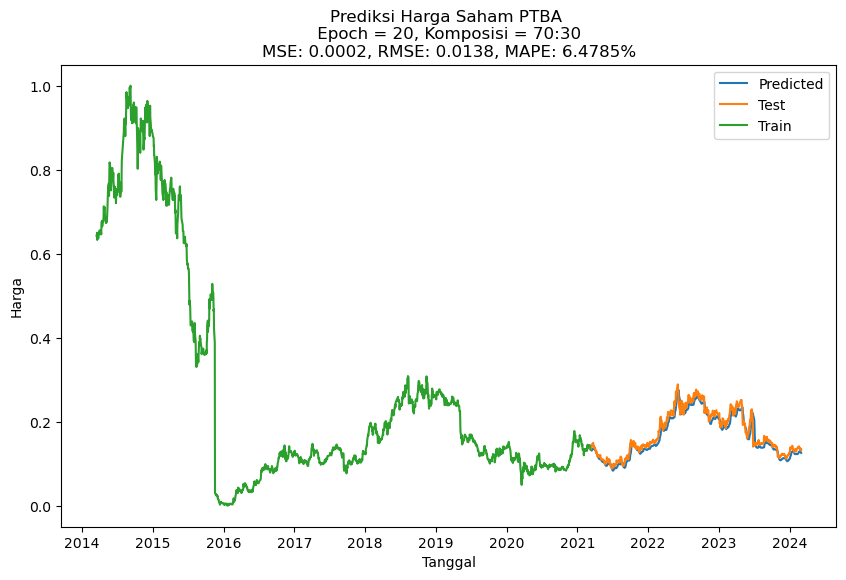

In [40]:
# Plotting hasil prediksi dan nilai aktual
plt.figure(figsize=(10, 6))
for label, df in combined_df.groupby('Type'):
    plt.plot(df['Tanggal'], df['Value'], label=label)
plt.title('Prediksi Harga Saham PTBA \n 'f"Epoch = {num_epochs}"', Komposisi = 70:30 \n' f"MSE: {mse:.4f}" ', ' f"RMSE: {rmse:.4f}" ', ' f"MAPE: {mape:.4%}")
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()